# Multilayer Perceptron: Solution

## 0. 모듈 불러오기

In [23]:
''' 기본 모듈 및 시각화 모듈 '''
from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

''' 데이터 전처리 모듈 '''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

''' Multilayer Perceptron 모듈 '''
from sklearn.neural_network import MLPClassifier

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

''' 기타 optional'''
pd.options.display.float_format = '{:.4f}'.format

! git clone https://github.com/KU-DIC/LG_time_series_day08.git

## 1. 데이터 불러오기
### StarCraft 분류 문제
<a href='https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset'> https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset </a>

### 설명변수 (X)
- 1. GameID: Unique ID number for each game (integer)
- 3. Age: Age of each player (integer)
- 4. HoursPerWeek: Reported hours spent playing per week (integer)
- 5. TotalHours: Reported total hours spent playing (integer)
- 6. APM: Action per minute (continuous)
- 7. SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)
- 8. AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp (continuous)
- 9. UniqueHotkeys: Number of unique hotkeys used per timestamp (continuous)
- 10. MinimapAttacks: Number of attack actions on minimap per timestamp (continuous)
- 11. MinimapRightClicks: number of right-clicks on minimap per timestamp (continuous)
- 12. NumberOfPACs: Number of PACs per timestamp (continuous)
- 13. GapBetweenPACs: Mean duration in milliseconds between PACs (continuous)
- 14. ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)
- 15. ActionsInPAC: Mean number of actions within each PAC (continuous)
- 16. TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)
- 17. WorkersMade: Number of SCVs, drones, and probes trained per timestamp (continuous)
- 18. UniqueUnitsMade: Unique unites made per timestamp (continuous)
- 19. ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp (continuous)
- 20. ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp (continuous)

### 반응변수 (Y)
- 2. LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)

In [24]:
data = pd.read_csv('./LG_time_series_day08/data/SkillCraft1_Dataset.csv')

## 2. 데이터 전처리하기

### 데이터 확인

In [25]:
print('Data shape: {}'.format(data.shape))
data.head()

Data shape: (3338, 20)


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.0035,0.0002,7,0.0001,0.0004,0.0048,32.6677,40.8673,4.7508,28,0.0014,6,0.0000,0.0000
1,55,5,23,10,5000,129.2322,0.0033,0.0003,4,0.0003,0.0004,0.0043,32.9194,42.3454,4.8434,22,0.0012,5,0.0000,0.0002
2,56,4,30,10,200,69.9612,0.0011,0.0003,4,0.0003,0.0005,0.0029,44.6475,75.3548,4.0430,22,0.0007,6,0.0000,0.0002
3,57,3,19,20,400,107.6016,0.0010,0.0002,1,0.0001,0.0005,0.0038,29.2203,53.7352,4.9155,19,0.0004,7,0.0000,0.0004
4,58,3,32,10,500,122.8908,0.0011,0.0003,2,0.0000,0.0013,0.0024,22.6885,62.0813,9.3740,15,0.0012,4,0.0000,0.0000


### Column별 기초 통계량 확인

In [26]:
data.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000,3338.0000
mean,4719.5521,4.1207,21.6504,15.9095,960.4218,114.5758,0.0040,0.0004,4.3164,0.0001,0.0004,0.0034,40.7138,64.2096,5.2670,22.1168,0.0010,6.5410,0.0001,0.0001
std,2656.9196,1.4482,4.2064,11.9645,17318.1339,48.1119,0.0047,0.0002,2.3333,0.0002,0.0004,0.0010,17.0572,19.0374,1.5006,7.4409,0.0005,1.8590,0.0001,0.0003
min,52.0000,1.0000,16.0000,0.0000,3.0000,22.0596,0.0000,0.0000,0.0000,0.0000,0.0000,0.0007,6.6667,24.6326,2.0389,5.0000,0.0001,2.0000,0.0000,0.0000
25%,2423.2500,3.0000,19.0000,8.0000,300.0000,79.2315,0.0012,0.0002,3.0000,0.0000,0.0001,0.0027,29.3266,50.8864,4.2615,17.0000,0.0007,5.0000,0.0000,0.0000
50%,4788.0000,4.0000,21.0000,12.0000,500.0000,107.0703,0.0024,0.0003,4.0000,0.0000,0.0003,0.0034,37.0589,61.2961,5.0870,22.0000,0.0009,6.0000,0.0000,0.0000
75%,6994.7500,5.0000,24.0000,20.0000,800.0000,140.1561,0.0049,0.0005,6.0000,0.0001,0.0005,0.0040,48.5104,74.0325,6.0274,27.0000,0.0013,8.0000,0.0001,0.0002
max,9271.0000,7.0000,44.0000,168.0000,1000000.0000,389.8314,0.0431,0.0016,10.0000,0.0030,0.0037,0.0080,237.1429,176.3721,18.5581,58.0000,0.0051,13.0000,0.0009,0.0031


### 불필요한 변수 제거

In [27]:
# GameID 고유 개수
num_id = len(data['GameID'].unique())

print(f'ID: {num_id}')

ID: 3338


In [28]:
# GameID 제거
data.drop(columns=['GameID'], axis=1, inplace=True)

In [29]:
print('Data shape: {}'.format(data.shape))
data.head()

Data shape: (3338, 19)


,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5,27,10,3000,143.7180,0.0035,0.0002,7,0.0001,0.0004,0.0048,32.6677,40.8673,4.7508,28,0.0014,6,0.0000,0.0000
1,5,23,10,5000,129.2322,0.0033,0.0003,4,0.0003,0.0004,0.0043,32.9194,42.3454,4.8434,22,0.0012,5,0.0000,0.0002
2,4,30,10,200,69.9612,0.0011,0.0003,4,0.0003,0.0005,0.0029,44.6475,75.3548,4.0430,22,0.0007,6,0.0000,0.0002
3,3,19,20,400,107.6016,0.0010,0.0002,1,0.0001,0.0005,0.0038,29.2203,53.7352,4.9155,19,0.0004,7,0.0000,0.0004
4,3,32,10,500,122.8908,0.0011,0.0003,2,0.0000,0.0013,0.0024,22.6885,62.0813,9.3740,15,0.0012,4,0.0000,0.0000


### 클래스 비율 확인
1: 브론즈<br>
2: 실버<br>
3: 골드<br>
4: 플래티넘<br>
5: 다이아<br>
6: 마스터<br>
7: 그랜드마스터<br>
8: 프로

In [30]:
data['LeagueIndex'].value_counts()

4    811
5    804
6    621
3    553
2    347
1    167
7     35
Name: LeagueIndex, dtype: int64

### 설명변수(X)와 반응변수(Y) 정의

In [31]:
X = data.drop(labels='LeagueIndex', axis=1)
y = data['LeagueIndex'].values

# 다이아 미만 : 0, 다이아 이상 : 1로 y 값 조정
y[y<5] = 0
y[y>=5] = 1

In [32]:
display(X.head())
display(y)

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,27,10,3000,143.7180,0.0035,0.0002,7,0.0001,0.0004,0.0048,32.6677,40.8673,4.7508,28,0.0014,6,0.0000,0.0000
1,23,10,5000,129.2322,0.0033,0.0003,4,0.0003,0.0004,0.0043,32.9194,42.3454,4.8434,22,0.0012,5,0.0000,0.0002
2,30,10,200,69.9612,0.0011,0.0003,4,0.0003,0.0005,0.0029,44.6475,75.3548,4.0430,22,0.0007,6,0.0000,0.0002
3,19,20,400,107.6016,0.0010,0.0002,1,0.0001,0.0005,0.0038,29.2203,53.7352,4.9155,19,0.0004,7,0.0000,0.0004
4,32,10,500,122.8908,0.0011,0.0003,2,0.0000,0.0013,0.0024,22.6885,62.0813,9.3740,15,0.0012,4,0.0000,0.0000


array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

### 학습 데이터(Training Dataset)와 테스트 데이터(Testing Dataset) 분리
- 학습데이터와 테스트 데이터의 클래스 비율이 달라지지 않도록 stratify 옵션 사용

In [33]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

### 정규화 : Standardization(표준정규화) with Standard Scaler

In [34]:
train_X.describe()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000
mean,21.6695,16.0240,1088.9525,115.3803,0.0042,0.0004,4.3116,0.0001,0.0004,0.0034,40.7028,64.1880,5.2696,22.1772,0.0010,6.5454,0.0001,0.0001
std,4.2669,12.1492,20694.1316,49.1469,0.0050,0.0002,2.3504,0.0002,0.0003,0.0010,16.9593,19.1101,1.5075,7.4205,0.0005,1.8456,0.0001,0.0003
min,16.0000,0.0000,7.0000,22.0596,0.0000,0.0000,0.0000,0.0000,0.0000,0.0007,6.6667,28.7342,2.0389,5.0000,0.0002,2.0000,0.0000,0.0000
25%,18.0000,8.0000,300.0000,79.2924,0.0013,0.0002,3.0000,0.0000,0.0001,0.0028,29.2306,50.7225,4.2516,17.0000,0.0007,5.0000,0.0000,0.0000
50%,21.0000,12.0000,500.0000,107.0703,0.0025,0.0004,4.0000,0.0000,0.0003,0.0034,37.2128,61.1624,5.0808,22.0000,0.0009,7.0000,0.0000,0.0000
75%,24.0000,20.0000,800.0000,141.7314,0.0050,0.0005,6.0000,0.0001,0.0005,0.0040,48.6054,74.2067,6.0465,27.0000,0.0013,8.0000,0.0001,0.0002
max,44.0000,168.0000,1000000.0000,389.8314,0.0431,0.0016,10.0000,0.0020,0.0030,0.0072,160.9535,176.3721,18.5581,56.0000,0.0043,13.0000,0.0009,0.0031


In [35]:
# 정규화
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [36]:
pd.DataFrame(train_X, columns = X.columns).describe()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000,2336.0000
mean,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002
min,-1.3290,-1.3192,-0.0523,-1.8992,-0.8336,-1.7455,-1.8348,-0.6071,-1.0869,-2.8490,-2.0074,-1.8556,-2.1435,-2.3153,-1.6804,-2.4634,-0.5327,-0.5253
25%,-0.8602,-0.6606,-0.0381,-0.7344,-0.5815,-0.7690,-0.5582,-0.6071,-0.6860,-0.7083,-0.6766,-0.7048,-0.6754,-0.6978,-0.6722,-0.8375,-0.5327,-0.5253
50%,-0.1569,-0.3313,-0.0285,-0.1691,-0.3331,-0.0611,-0.1326,-0.3526,-0.2846,-0.0720,-0.2058,-0.1584,-0.1253,-0.0239,-0.2444,0.2464,-0.5327,-0.4534
75%,0.5463,0.3273,-0.0140,0.5363,0.1625,0.5981,0.7185,0.1289,0.3865,0.5843,0.4661,0.5244,0.5154,0.6501,0.4389,0.7883,0.2334,0.1195
max,5.2345,12.5118,48.2806,5.5855,7.8151,6.0914,2.4207,12.3729,7.6968,3.8761,7.0921,5.8717,8.8166,4.5590,6.2981,3.4981,7.3758,11.1261


## 3. 모델링: Multilayer Perceptron (MLP) Classifier

In [37]:
clf_mlp = MLPClassifier(hidden_layer_sizes=100,
                        activation='relu',
                        solver='adam',
                        batch_size=64,
                        learning_rate_init=0.0005,
                        max_iter=500,
                        verbose=True,
                        random_state=0)

### MLP Classifier 학습

In [17]:
clf_mlp.fit(train_X, train_y)

Iteration 1, loss = 0.62608415
Iteration 2, loss = 0.50295629
Iteration 3, loss = 0.46113349
Iteration 4, loss = 0.44308417
Iteration 5, loss = 0.43452001
Iteration 6, loss = 0.42885547
Iteration 7, loss = 0.42530401
Iteration 8, loss = 0.42298468
Iteration 9, loss = 0.42063107
Iteration 10, loss = 0.41832748
Iteration 11, loss = 0.41666492
Iteration 12, loss = 0.41490575
Iteration 13, loss = 0.41361519
Iteration 14, loss = 0.41202002
Iteration 15, loss = 0.41058528
Iteration 16, loss = 0.40931136
Iteration 17, loss = 0.40802960
Iteration 18, loss = 0.40673095
Iteration 19, loss = 0.40588428
Iteration 20, loss = 0.40419310
Iteration 21, loss = 0.40304254
Iteration 22, loss = 0.40223264
Iteration 23, loss = 0.40111927
Iteration 24, loss = 0.39992415
Iteration 25, loss = 0.39898283
Iteration 26, loss = 0.39806472
Iteration 27, loss = 0.39689445
Iteration 28, loss = 0.39620579
Iteration 29, loss = 0.39527222
Iteration 30, loss = 0.39412325
Iteration 31, loss = 0.39332776
Iteration 32, los

C:\Users\SAM\Miniconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=100, learning_rate_init=0.0005,
              max_iter=500, random_state=0, verbose=True)

### 학습 상태 확인 (learning curve)

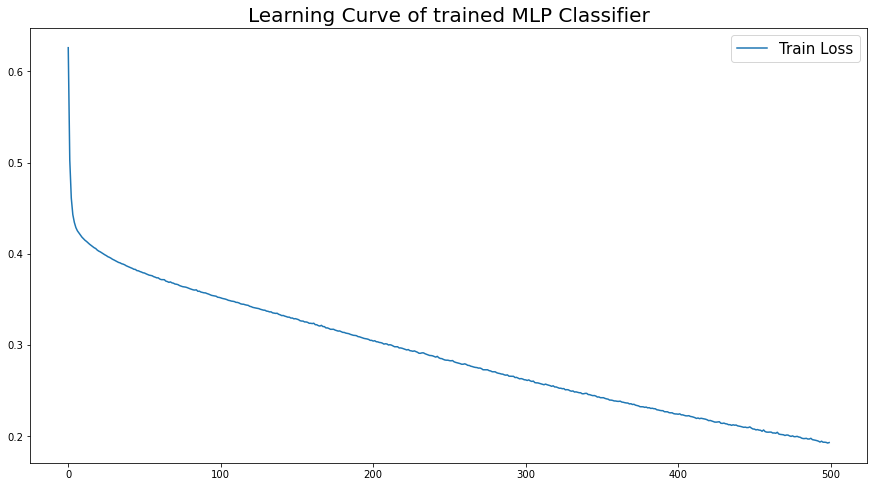

In [18]:
plt.figure(figsize=(15, 8))

train_loss_values = clf_mlp.loss_curve_
plt.plot(train_loss_values,label='Train Loss')

plt.legend(fontsize=15)
plt.title("Learning Curve of trained MLP Classifier", size=20)
plt.show()

## 4. Multilayer Perceptron 모델 성능 평가

### 학습된 MLP Classifier 결과 확인: Training Data

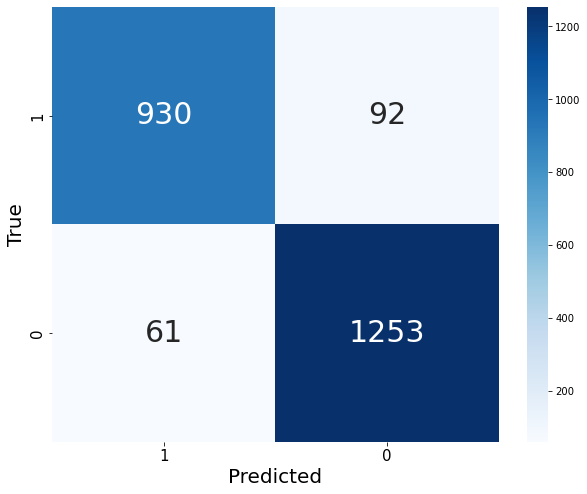

In [19]:
# 학습한 데이터에 대한 예측값
train_y_pred = clf_mlp.predict(train_X)

# confusion matrix 계산
cm_train = confusion_matrix(y_true=train_y, y_pred=train_y_pred, labels=[1,0])

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 30}, cmap='Blues')
plt.xticks(ticks=[0.5,1.5], labels=[1,0], size=15)
plt.yticks(ticks=[0.5,1.5], labels=[1,0], size=15)
plt.xlabel('Predicted', size=20)
plt.ylabel('True', size=20)
plt.show()

### 학습된 MLP Classifier 결과 확인: Testing Data

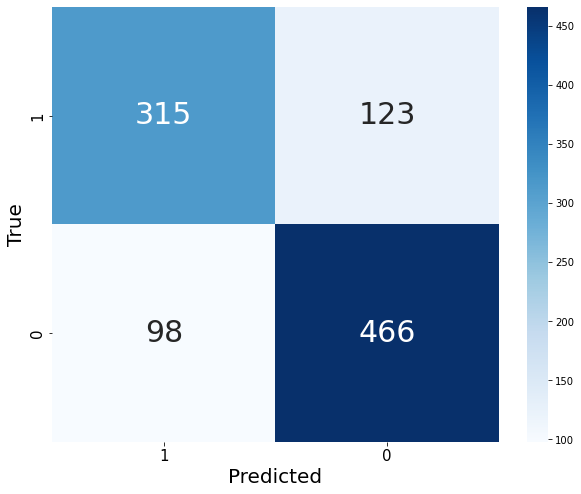

In [20]:
# 테스트 데이터에 대한 예측값
test_y_pred = clf_mlp.predict(test_X)

# confusion matrix 계산
cm_test = confusion_matrix(y_true=test_y, y_pred=test_y_pred, labels=[1,0])

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 30}, cmap='Blues')
plt.xticks(ticks=[0.5,1.5], labels=[1,0], size=15)
plt.yticks(ticks=[0.5,1.5], labels=[1,0], size=15)
plt.xlabel('Predicted', size=20)
plt.ylabel('True', size=20)
plt.show()

### 학습된 MLP Classifier 성능 평가: Training Data

In [21]:
train_acc = accuracy_score(train_y, train_y_pred)
train_rec = recall_score(train_y, train_y_pred)
train_prec = precision_score(train_y, train_y_pred)
train_f1 = f1_score(train_y, train_y_pred)


print('Train Accuracy   : {:.3f}'.format(train_acc))
print('Train Sensitivity: {:.3f}'.format(train_rec))
print('Train Precision  : {:.3f}'.format(train_prec))
print('Train F1 Score   : {:.3f}'.format(train_f1))

Train Accuracy   : 0.935
Train Sensitivity: 0.910
Train Precision  : 0.938
Train F1 Score   : 0.924


### 학습된 MLP Classifier 성능 평가: Testing Data

In [22]:
test_acc = accuracy_score(test_y, test_y_pred)
test_rec = recall_score(test_y, test_y_pred)
test_prec = precision_score(test_y, test_y_pred)
test_f1 = f1_score(test_y, test_y_pred)

print('Test Accuracy   : {:.3f}'.format(test_acc))
print('Test Recall     : {:.3f}'.format(test_rec))
print('Test Precision  : {:.3f}'.format(test_prec))
print('Test F1 Score   : {:.3f}'.format(test_f1))

Test Accuracy   : 0.779
Test Recall     : 0.719
Test Precision  : 0.763
Test F1 Score   : 0.740
